<a href="https://colab.research.google.com/github/CFretter/komorebi/blob/main/komorebi_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

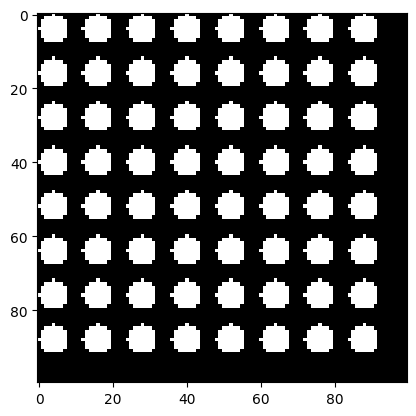

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def create_cheese_grater_matrix(rows, cols, radius):
  """
  Creates a numpy matrix with regular spaced circles like a cheese grater.

  Args:
    rows: Number of rows in the matrix.
    cols: Number of columns in the matrix.
    radius: Radius of the circles.

  Returns:
    A numpy matrix with circles.
  """
  # Create an empty matrix
  matrix = np.zeros((rows, cols))

  # Calculate center coordinates for circles
  center_x = np.arange(radius, cols, 3 * radius)
  center_y = np.arange(radius, rows, 3 * radius)

  # Create circles
  for x in center_x:
    for y in center_y:
      # Use np.mgrid instead of np.ogrid to get matrices of the same size
      y_coords, x_coords = np.mgrid[
          -radius:radius:1, -radius:radius:1
      ]
      mask = (x_coords**2 + y_coords**2) <= radius**2
      # Directly apply the mask to the slice
      matrix[
          int(y - radius) : int(y + radius), int(x - radius) : int(x + radius)
      ] = mask


  return matrix

# Example usage
rows = 100
cols = 100
radius = 4
matrix = create_cheese_grater_matrix(rows, cols, radius)

# Display the matrix
plt.imshow(matrix, cmap='gray')
plt.show()

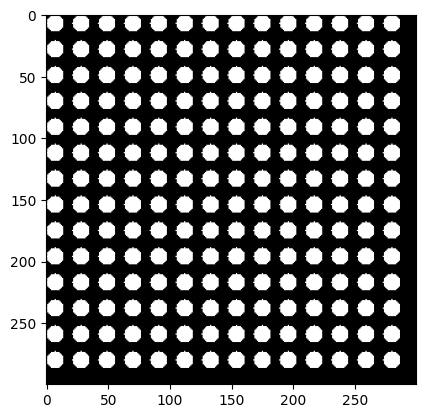

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def create_cheese_grater_matrix(rows, cols, radius):
  """
  Creates a numpy matrix with regular spaced circles like a cheese grater.

  Args:
    rows: Number of rows in the matrix.
    cols: Number of columns in the matrix.
    radius: Radius of the circles.

  Returns:
    A numpy matrix with circles.
  """
  # Create an empty matrix
  matrix = np.zeros((rows, cols))

  # Calculate center coordinates for circles
  center_x = np.arange(radius, cols, 3 * radius)
  center_y = np.arange(radius, rows, 3 * radius)

  # Create circles
  for x in center_x:
    for y in center_y:
      # Generate coordinates for a grid around the center of the circle
      x_coords = np.arange(x - radius, x + radius)
      y_coords = np.arange(y - radius, y + radius)
      for i in x_coords:
        for j in y_coords:
          if (i - x)**2 + (j - y)**2 <= radius**2:
            if 0 <= i < cols and 0 <= j < rows: # Check boundaries
              matrix[int(j), int(i)] = 1

  return matrix

# Example usage
rows = 300
cols = 300
radius = 7
grater = create_cheese_grater_matrix(rows, cols, radius)

# Display the matrix
plt.imshow(grater, cmap='gray')
plt.show()

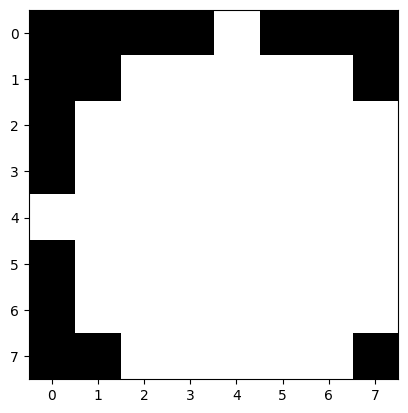

In [6]:
sun = create_cheese_grater_matrix(8,8, 4)

# Display the matrix
plt.imshow(sun, cmap='gray')
plt.show()

<ipython-input-9-c7f09c602c36>:11: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1031.)
  convolved_t = torch.conv2d( grater_t,sun_t, padding='same').squeeze().numpy()


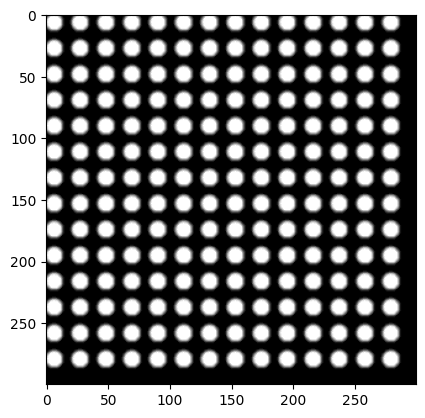

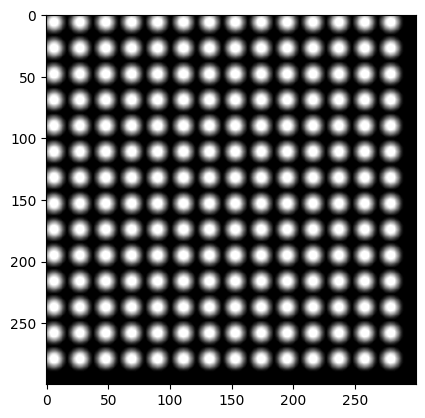

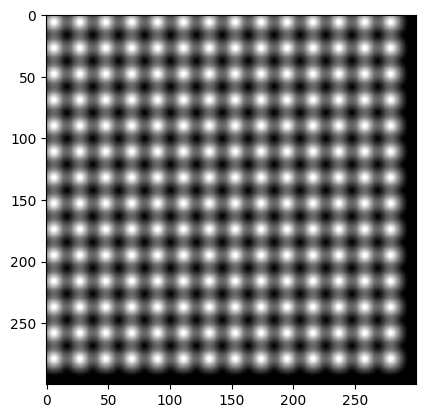

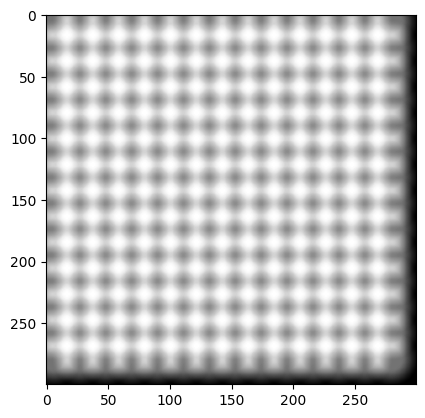

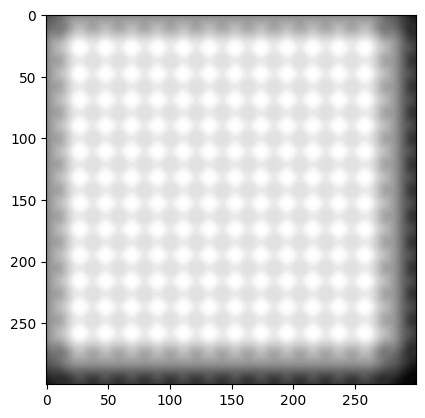

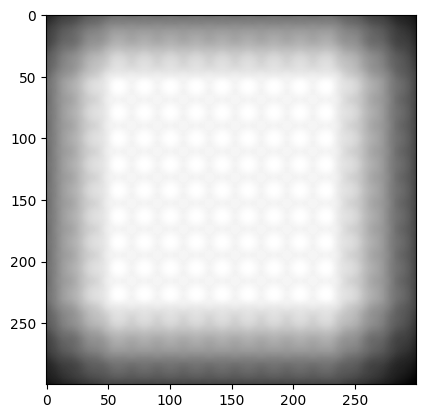

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
import torch
for sun_size in 2,4,8,16,32,64:
  sun_s=create_cheese_grater_matrix(sun_size*2, sun_size*2,sun_size)

  sun_t = torch.tensor(sun_s).unsqueeze(0).unsqueeze(0)
  grater_t = torch.tensor(grater).unsqueeze(0).unsqueeze(0)
  convolved_t = torch.conv2d( grater_t,sun_t, padding='same').squeeze().numpy()

# Display the convolved image
  plt.imshow(convolved_t, cmap='gray')
  plt.show()

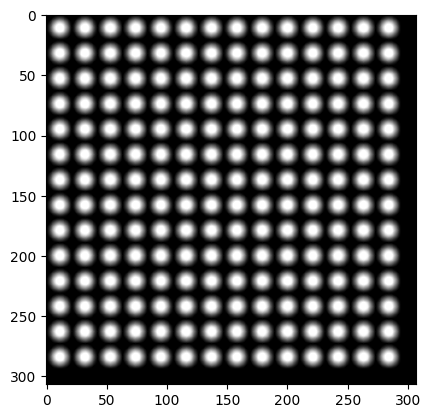

In [10]:
#numpy:
convolved=convolve2d(sun, grater, mode='full')

# Display the convolved image
plt.imshow(convolved, cmap='gray')
plt.show()

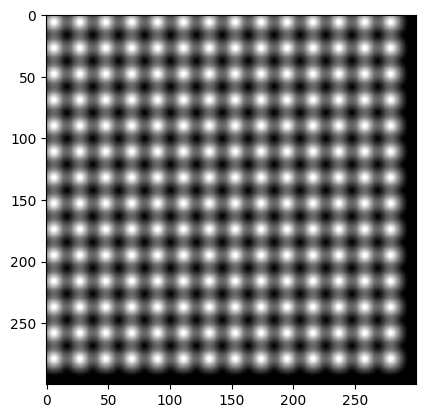

In [11]:
#torch:
sun_size=8
sun_s=create_cheese_grater_matrix(sun_size*2, sun_size*2,sun_size)
sun_t = torch.tensor(sun_s).unsqueeze(0).unsqueeze(0)
grater_t = torch.tensor(grater).unsqueeze(0).unsqueeze(0)
convolved_t = torch.conv2d( grater_t,sun_t, padding='same').squeeze().numpy()
plt.imshow(convolved_t, cmap='gray')
plt.show()

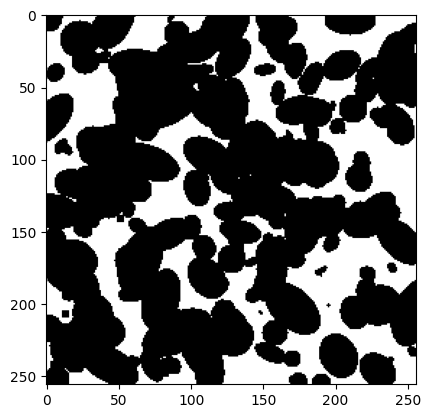

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse
from scipy.ndimage import gaussian_filter
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from skimage import exposure

def create_matrix_with_ellipses(num_ellipses,sigma):
  """
  Creates an empty matrix and draws a given number of black ellipses on it.

  Args:
    num_ellipses: The number of ellipses to draw.

  Returns:
    A NumPy array representing the matrix with the drawn ellipses.
  """

  # Create an empty matrix
  matrix_size = 256
  matrix = np.ones((matrix_size, matrix_size))

  # Draw ellipses
  for _ in range(num_ellipses):
    # Generate random ellipse parameters
    x = np.random.randint(0, matrix_size)
    y = np.random.randint(0, matrix_size)
    r = np.random.randint(2, 15)
    c = int(np.random.uniform(0.5, 2)*r)
    angle = np.random.randint(0, 360)

    # Draw the ellipse
    rr, cc = ellipse(x, y, r, c,shape=[matrix_size,matrix_size ], rotation=angle)
    matrix[rr, cc] = 0

  return gaussian_filter(matrix, sigma)

# Call the function to create the matrix
matrix = create_matrix_with_ellipses(250,0)

# Plot the matrix as an image
plt.imshow(matrix, cmap='gray')
plt.show()

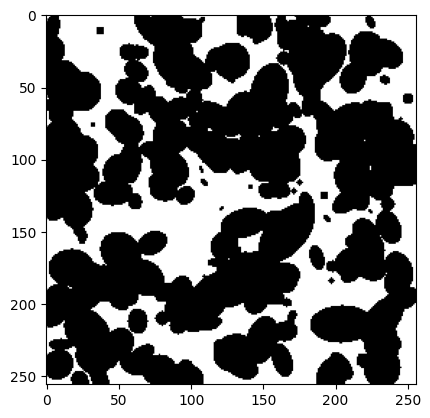

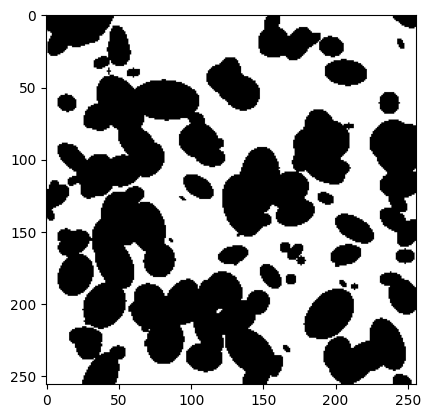

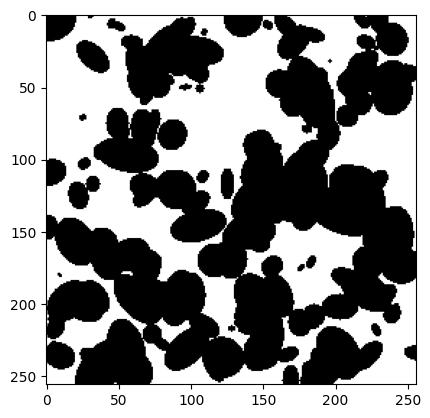

In [13]:
matrix1 = create_matrix_with_ellipses(250,0)
matrix2 = create_matrix_with_ellipses(150,0)
matrix3 = create_matrix_with_ellipses(190,0)

plt.imshow(matrix1, cmap='gray')
plt.show()
plt.imshow(matrix2, cmap='gray')
plt.show()
plt.imshow(matrix3, cmap='gray')
plt.show()

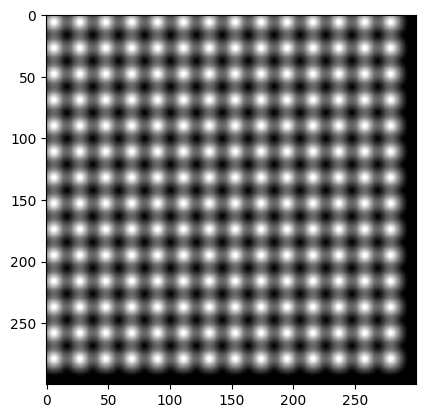

In [14]:
def project2(l1,l2):
  sun_t = torch.tensor(l1).unsqueeze(0).unsqueeze(0)
  grater_t = torch.tensor(l2).unsqueeze(0).unsqueeze(0)
  return torch.conv2d( grater_t,sun_t, padding='same').squeeze().numpy()
sun_size=8
sun_s=create_cheese_grater_matrix(sun_size*2, sun_size*2,sun_size)
convolved_t=project2(sun_s,grater)
plt.imshow(convolved_t, cmap='gray')
plt.show()

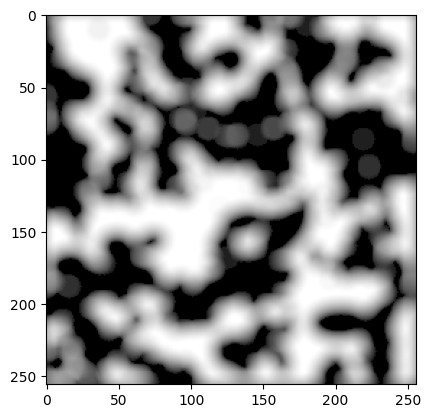

In [16]:

convolved_t1=project2(sun_s,matrix1)
result_gamma=exposure.adjust_gamma(convolved_t1, 0.4)
plt.imshow(result_gamma, cmap='gray')
plt.show()

In [ ]:
convolved_t2=project2(convolved_t1,matrix2)
plt.imshow(convolved_t, cmap='gray')
plt.show()